# **Billionaire Index**

### The top 500 billionaires of the world

On this dataset, I will be exploring the types of industries where the top 500 billionaires source their wealth from for the year 2021. In order for me to conduct this analysis, I will be using the below 6 columns:
1. **Name**
2. **Total_Net_Worth** - The net worth of the billionaire
3. **LastChange** - the amount by which the net worth of the billionaire changed
4. **YTDChange** - the year to date change of the net worth of the billionaire
5. **Country** - the country where the company domiciles from 
6. **Industry** - the billionaire's source of wealth

**Using these above columns, I am looking to answer my below questions:**

1. **What kinds of industries are on the list?**
2. **How many billionaires are there from each industry?**
3. **Who are top 20 billionaires on the world by net worth?**
4. **Who are the top 20 billionaires on the world by last change?**
5. **Who are the top 20 billionaires on the world by year to date change?**
6. **What is the correlation like for the columns specifically for Total Net Worth, last change and Year to date change?**
7. **What countries are on the list?**
8. **What is the percentage of the distribution by industry using the total net worth in the Americas, Europe, Asia, Africa, Middle East and Oceania?**

### **Hypothesis**

**Based on the above questions, my hypothesis is that billionaires from the diversified industry are thriving in all regions**

# **Dataset**

The below dataset comprises the details and the letter 'B'  means billions and 'M' means millions

In [1]:
#the below codesare for bringing my dataset into Jupyter labs and get an idea of what the dataset is about

import pandas as pd #use pandas library for the csv file analysis
import numpy as np #to process the data for arrays
import matplotlib.pyplot as plt # it is for the graphical plotting library
import seaborn as sns # for making statistical graphs
import statsmodels.api as sm # this is to the estimate statistical models, and perform statistical tests
df = pd.read_csv('BillionairesIndex.csv')#to pull in the dataset
df.sample(500)# to generate sample random rows/columns of the dataset

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
357,Shari Arison,$7.72B,-$23.9M,+$1.17B,Israel,Diversified
277,George Lucas,$9.05B,-$22.6M,-$124M,UnitedStates,Entertainment
179,Kumar Birla,$12.0B,-$39.8M,+$5.18B,India,Industrial
264,Ding Shijia,$9.39B,-$82.9M,-$91.5M,China,Consumer
359,Chen Jianhua,$7.66B,-$278M,-$1.62B,China,Industrial
...,...,...,...,...,...,...
479,Andreas Halvorsen,$6.10B,+$8.94M,+$2.03B,Norway,Finance
79,Thomas Frist,$22.5B,-$14.7M,+$6.71B,UnitedStates,Health Care
493,Eric Smidt,$5.94B,+$42.1M,+$354M,UnitedStates,Retail
158,Jan Koum,$13.6B,$0,+$1.59B,UnitedStates,Technology


## **Data Wrangling**

In [2]:
#Just to avoid changing the original dataset, I wanted to create another copy as DF1 to clean my dataset
df1 = df.copy() 

In [3]:
#Basic information about dataset for cleaning
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             500 non-null    object
 1   Total_Net_Worth  500 non-null    object
 2   LastChange       500 non-null    object
 3   YTDChange        500 non-null    object
 4   Country          500 non-null    object
 5   Industry         500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [4]:
#the below code provides the rows and columns respectively
df1.shape

(500, 6)

In [5]:
# I want to rename my columns for readability purpose, in this case I will be renaming the 'Total_Net_Worth','LastChange' and the 'YTDChange' columns
df1.rename (columns= {'Total_Net_Worth': 'Total_Net_Worth_Billions(USD)', 'LastChange':'LastChange_Billions(USD)','YTDChange':'YTDChange_Billions(USD)'}, inplace=True) # the columns to be renamed
df1.sample() #to check if the columns has been changed as intended

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
16,Zhong Shanshan,$65.2B,-$68.5M,-$13.0B,China,Diversified


In [6]:
# Now I am also looking to clean the 'Total_Net_Worth_Billions(USD)' column by removing the '$' and 'B'

df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].map(lambda x: x.lstrip('$')) # this code refers to removing the "$"
df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].map(lambda x: x.rstrip('B')) # this code refers to removing the "B"
df1.sample()

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
154,Sam Bankman-Fried,14.0,+$189M,+$12.3B,UnitedStates,Finance


**The above table does do provide me with the output I want but it shows that further cleaning is required because of the letter B and M that needs to be replaced so that I am not misleading my analysis with and The above table now shows that the 'LastChange' column is now cleaned by using the `regex`, `rstrip` and `lstrip`**

In [7]:
#for the below code I am looking to replace certain characters like the $, M, K and B(for the 'LastChange_Billions(USD)' column)
def change(df1, col):
    df1[col] = df1[col].replace({'\$':''}, regex =  True) # this is for replacing the the "$" figure to blank

def clear(x):
    if 'M' in x:
        return float(x.rstrip('M')) / 1000 # this is replace figures ending with "M"(which is millions) by dividing it by a thousand
    elif 'k' in x:
        return float(x.rstrip('k')) / 10 ** 6 # this is replace figures ending with "K"(which is thousand) by dividing it by a million
    else:
        return float(x.rstrip('B')) #return the figures as normal if ending with "B"

change(df1, 'LastChange_Billions(USD)') # this is referring to the column I am trying to change
df1['LastChange_Billions(USD)'] = df1['LastChange_Billions(USD)'].apply(clear)

In [8]:
#for the below code I am looking to replace certain characters like the $, M, K and B ('YTDChange_Billions(USD)' column)
def change(df1, col):
    df1[col] = df1[col].replace({'\$':''}, regex =  True) # this is for replacing the the "$" figure to blank

def clear(x):
    if 'M' in x:
        return float(x.rstrip('M')) / 1000 #this is replace figures ending with "M"(which is millions) by dividing it by a thousand
    elif 'k' in x:
        return float(x.rstrip('k')) / 10 ** 6 #this is replace figures ending with "K"(which is thousand) by dividing it by a million
    else:
        return float(x.rstrip('B')) #return the figures as normal if ending with "B"

change(df1, 'YTDChange_Billions(USD)')#this is referring to the column I am trying to change
df1['YTDChange_Billions(USD)'] = df1['YTDChange_Billions(USD)'].apply(clear) 

In [9]:
#the below codes/functions is Converting the below columns from object to float for my data exploration

df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].astype(float)
df1['LastChange_Billions(USD)'] = df1['LastChange_Billions(USD)'].astype(float)
df1['YTDChange_Billions(USD)'] = df1['YTDChange_Billions(USD)'].astype(float)

**Using the `astype` functions above, the columns are now been converted from ``object`` to ``float`` so that the columns are being read as intended which is the most important step**

In [10]:
# the below code will ascertain that I did convert the required columns to float
df1.dtypes

Name                              object
Total_Net_Worth_Billions(USD)    float64
LastChange_Billions(USD)         float64
YTDChange_Billions(USD)          float64
Country                           object
Industry                          object
dtype: object

In [11]:
#Checking for duplicates
df1.duplicated().value_counts()

False    500
dtype: int64

### Final step

In [12]:
df1.sample(5)#to check if the data has been cleaned after the above steps

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
78,Thomas Peterffy,22.50,0.0748,2.96,UnitedStates,Finance
259,Wee Cho Yaw,9.61,-0.0455,1.13,Singapore,Finance
275,Taylor Thomson,9.07,0.0631,2.26,Canada,Media&Telecom
162,Eric Yuan,13.50,-0.0915,-2.91,UnitedStates,Technology
153,Mikhail Prokhorov,14.00,0.0188,1.26,RussianFederation,Diversified


## **Data Exploratory**

**What kinds of industries are on the list?**

In [13]:
Industry = df1['Industry'].unique()# to populate the number of industries in this column
print(Industry)

['Technology' 'Consumer' 'Diversified' 'Energy' 'Industrial' 'Retail'
 'Food&Beverage' 'Finance' 'Commodities' 'Real Estate' 'Entertainment'
 'Health Care' 'Media&Telecom' ' Media&Telecom' 'Services' 'Islands']


***The above shows the type of industries***

**How many billionaires are there from each industry?**

In [14]:
# the below code will count the number of billionaires in every industry
IndustryCount = df1.groupby('Industry').size().sort_values(ascending=False).to_frame()#to count the number of billionaires in each industry
IndustryCount.columns = ['Count'] #to add the 'count' column 
IndustryCount=IndustryCount.reset_index() # to change the count column to index

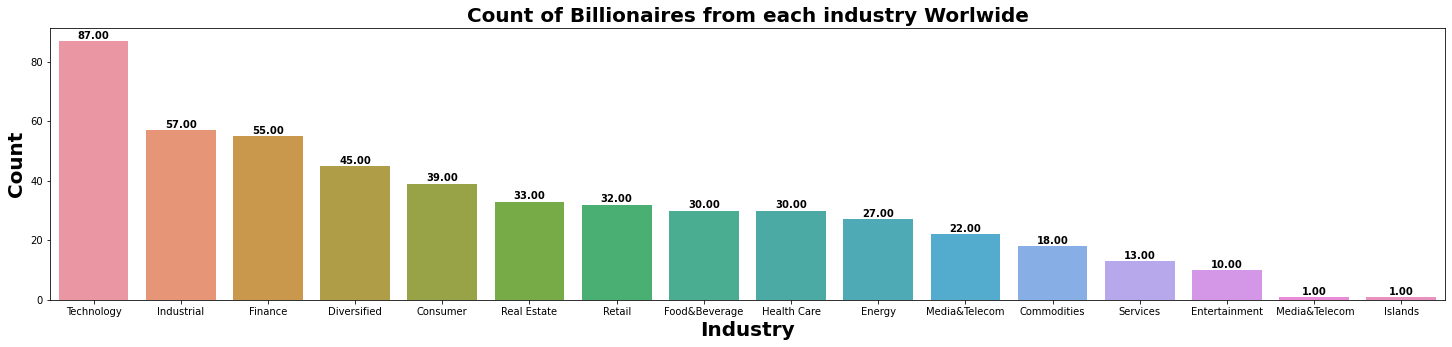

In [15]:
fig = plt.figure(figsize=(25,5))# size of the figure
plot = sns.barplot(data=IndustryCount, x='Industry', y='Count')#assigning the columns for the graph
plt.title('Count of Billionaires from each industry Worlwide',fontsize=20,fontweight='bold')#adding the title to the chart
plt.ylabel("Count",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis

for bar in plot.patches:# Iterrating over the bars one-by-one
   
  # Using the Matplotlib's annotate function and
  # for passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plot.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center',fontweight='bold', va='center',size=10, xytext=(0, 5.5),textcoords='offset points')

***The above table shows that the majority of the top 500 billionaires of the world are from the technology industry as their source of wealth***

**Who are top 20 billionaires on the world by net worth?**

In [16]:
#the below code is for the top 20 billionaires in the world
df1.sort_values(by='Total_Net_Worth_Billions(USD)', ascending=False).iloc[:21, :]

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.3200,141.00,UnitedStates,Technology
1,Jeff Bezos,195.0,-3.7900,5.06,UnitedStates,Technology
2,Bernard Arnault,167.0,-0.5440,52.70,France,Consumer
3,Bill Gates,136.0,0.9060,4.40,UnitedStates,Technology
4,Larry Page,131.0,1.7100,48.70,UnitedStates,Technology
5,Sergey Brin,126.0,1.6400,46.70,UnitedStates,Technology
6,Mark Zuckerberg,121.0,2.4000,17.30,UnitedStates,Technology
7,Steve Ballmer,118.0,2.4200,37.60,UnitedStates,Technology
8,Larry Ellison,115.0,0.3310,35.40,UnitedStates,Technology
9,Warren Buffett,105.0,-0.8000,17.00,UnitedStates,Diversified


***The above table shows the top 20 billionaires of the world, from the top 10 list - we can see that the source of wealth of these billionaires are from the technology industry and their net worth are extremely high when compared to their peers in other industries such as retail, diversified etc***

**Who are the top 20 billionaires on the world by last change?**

In [17]:
#The below code is for trying to populate the YTDChange of the billionaires from largest to smallest which are all positive
LastChange=df1.sort_values(by='LastChange_Billions(USD)', ascending=False).iloc[:21, :]
LastChange

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.320,141.00,UnitedStates,Technology
22,Zeng Yuqun,57.3,2.740,26.30,HongKong,Industrial
12,Gautam Adani,77.1,2.520,43.30,India,Industrial
57,Scott Farquhar,27.7,2.440,13.30,Australia,Technology
58,Mike Cannon-Brookes,27.7,2.440,13.30,Australia,Technology
7,Steve Ballmer,118.0,2.420,37.60,UnitedStates,Technology
6,Mark Zuckerberg,121.0,2.400,17.30,UnitedStates,Technology
4,Larry Page,131.0,1.710,48.70,UnitedStates,Technology
5,Sergey Brin,126.0,1.640,46.70,UnitedStates,Technology
46,Li Shu Fu,31.0,1.470,8.83,China,Industrial


***The above list again shows that last change which are all in the positive are also high and nothing less than 1.5 billion and are also from the technology industry***

**Who are the top 20 billionaires on the world by year to date change?**

In [18]:
#I will try the below code again to populate the YTDChange of the billionaires from the largest to smallest
YTDChange=df1.sort_values(by='YTDChange_Billions(USD)', ascending=False).iloc[:21, :]
YTDChange

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.3200,141.0,UnitedStates,Technology
2,Bernard Arnault,167.0,-0.5440,52.7,France,Consumer
4,Larry Page,131.0,1.7100,48.7,UnitedStates,Technology
5,Sergey Brin,126.0,1.6400,46.7,UnitedStates,Technology
12,Gautam Adani,77.1,2.5200,43.3,India,Industrial
7,Steve Ballmer,118.0,2.4200,37.6,UnitedStates,Technology
8,Larry Ellison,115.0,0.3310,35.4,UnitedStates,Technology
61,Miriam Adelson,26.9,-0.4020,26.9,UnitedStates,Entertainment
22,Zeng Yuqun,57.3,2.7400,26.3,HongKong,Industrial
30,Zhang Yiming,44.5,0.0000,19.5,China,Technology


***The above table shows that the year to date change for the top 20 list of these billionaires are again mainly from the technology sector plus the billionaire that tops this list is Elon Musk by $141.0 billion***

**What is the correlation like for the columns specifically for Total Net Worth, last change and Year to date change?**

<AxesSubplot:>

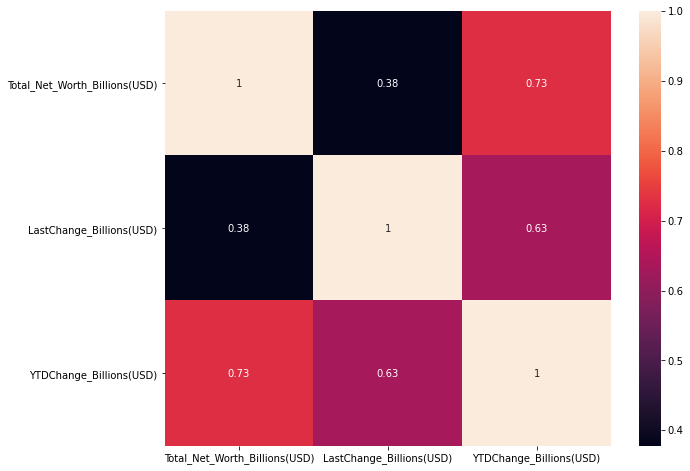

In [19]:
Correlation = df1.corr()#this code is for calculating the correlation

plt.figure(figsize = (10,8))#size of the graph
sns.heatmap(Correlation, annot=True)# to create a heatmap graph

***We can see that Total_Net worth_Billions(USD) and YTDChange_Billions(USD) are highly correlated  amongst other variables***

**What countries are on the list?**

In [20]:
#the below code to populate which Countries are on the list from the 'Country' column

Country = df1['Country'].unique()
print(Country)

['UnitedStates' 'France' 'India' 'Spain' 'China' 'Mexico' 'HongKong'
 'Germany' 'Italy' 'Japan' 'RussianFederation' 'Ireland' 'Australia'
 'UnitedKingdom' 'Brazil' 'Switzerland' 'Chile' 'Singapore' 'Sweden'
 'Nigeria' 'Malaysia' 'Indonesia' 'SaudiArabia' 'Netherlands' 'Greece'
 'Thailand' 'Austria' 'Canada' 'Taiwan' 'Israel' 'Colombia' 'Korea'
 'Ukraine' 'Denmark' 'Monaco' 'SouthAfrica' 'Cyprus' 'New Zealand'
 'VietNam' 'Philippines' 'Kazakhstan' 'Georgia' 'Egypt' 'Norway'
 'Argentina' 'Cayman' 'UAE' 'SouthKorea' 'Finland']


***the above are the list of countries***

## **What is the percentage of the distribution by industry using the total net worth in the Americas, Europe, Asia, Africa, Middle East and Oceania?**

## Americas

In [21]:
#Billionaires in the Americas

Americas = df1[df1['Country'].isin(['UnitedStates', 'Canada', 'Mexico','Brazil','Chile','Colombia','Argentina'])]# only including countries in the Americas
Americas.sample(5)#overview of the data

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
333,Gabe Newell,8.13,-0.0241,-1.04,UnitedStates,Technology
469,Ray Hunt,6.18,-0.0104,1.46,UnitedStates,Energy
180,Henry Kravis,12.00,0.0341,3.77,UnitedStates,Finance
165,Charles Ergen,13.30,-0.0328,2.62,UnitedStates,Media&Telecom
465,Arthur Irving,4.34,0.0000,-3.19,Canada,Energy


In [22]:
#groupby in terms of percentage
g=Americas.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order 
g['PercentageOfWealth'] = g['Total_Net_Worth_Billions(USD)']/Americas['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g.head(16)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
14,Technology,1752.99,0.433862
13,Services,60.84,0.015058
12,Retail,306.36,0.075824
11,Real Estate,95.03,0.023520
10,Media&Telecom,160.61,0.039751
9,Industrial,169.96,0.042065
8,Health Care,88.41,0.021881
7,Food&Beverage,224.77,0.055630
6,Finance,446.94,0.110617
5,Entertainment,82.89,0.020515


***The above table shows that the distribution(by total net worth) is the highest in techonology at $1.75 trillion***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities'),
  Text(14, 0, ' Media&Telecom')])

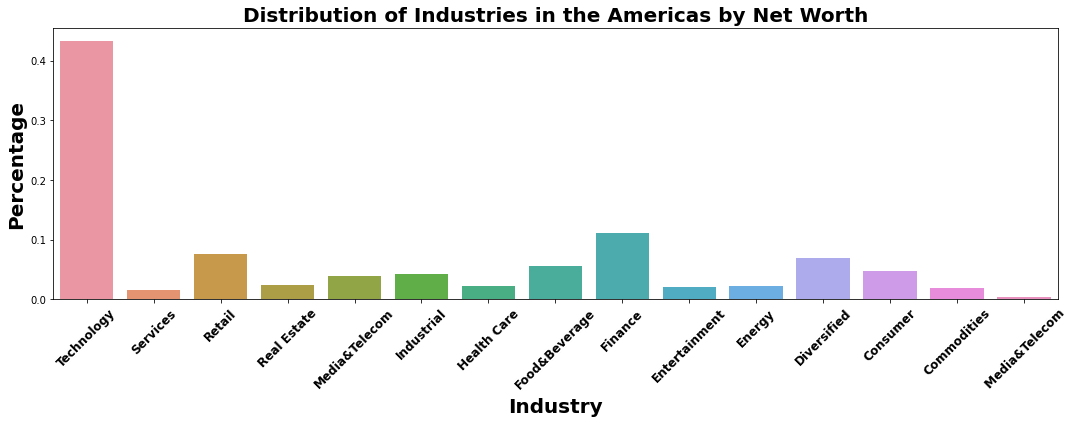

In [23]:
#graph
fig = plt.figure(figsize=(18,5))#graph size
plot = sns.barplot(data=g,x='Industry',y='PercentageOfWealth')#the data to be included

#the below is for labelling the graph
plt.title("Distribution of Industries in the Americas by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=45)#to style the x axis data

***The above graph shows that the technology industry accounts at over 40% by the total net worth combined for all individuals***

## Europe

In [24]:
#Billionaires in Europe

Europe = df1[df1['Country'].isin(['France', 'Spain', 'Germany','Kazakhstan', 'Italy', 'RussianFederation', 'Ireland', 'UnitedKingdom', 'Switzerland', 'Sweden', 'Netherlands', 'Greece', 'Austria','Ukraine', 'Denmark', 'Monaco', 'Norway'
 'Cayman', 'Finland' ])]# only including countries in Europe

Europe.sample(5)#overview of the data

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
201,John Collison,11.40,0.00000,7.080,Ireland,Technology
401,Peter-Alexander Wacker&family,7.05,0.00951,1.320,Germany,Industrial
136,Mikhail Fridman,15.10,-0.11500,0.627,RussianFederation,Diversified
220,Heinrich Deichmann&family,10.70,-0.17900,0.140,Germany,Retail
316,Oleg Tinkov,8.30,-0.10500,4.300,RussianFederation,Finance


In [25]:
#groupby in terms of percentage
g1=Europe.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order
g1['PercentageOfWealth'] = g1['Total_Net_Worth_Billions(USD)']/Europe['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g1.head(16)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
13,Technology,95.77,0.049358
12,Services,17.38,0.008957
11,Retail,227.75,0.117378
10,Real Estate,40.57,0.020909
9,Media&Telecom,26.43,0.013621
8,Industrial,358.74,0.184887
7,Health Care,121.55,0.062644
6,Food&Beverage,95.77,0.049358
5,Finance,78.09,0.040246
4,Entertainment,14.36,0.007401


***The above table shows that the distribution(by total net worth) is the highest in the Consumer sector at $476 billion***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities')])

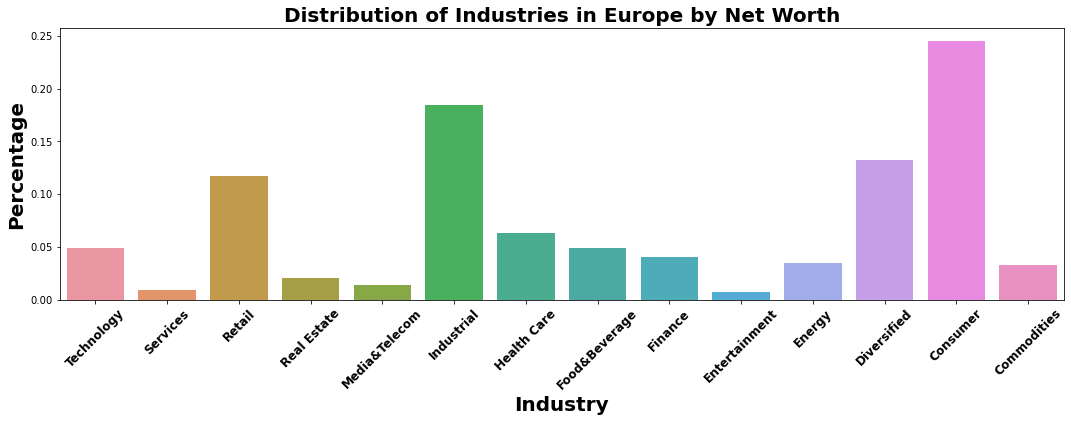

In [26]:
#graph
fig = plt.figure(figsize=(18,5))#graph size
plot = sns.barplot(data=g1,x='Industry',y='PercentageOfWealth')#the data to be included

#the below is for labelling the graph
plt.title("Distribution of Industries in Europe by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=45)#to style the x axis data

***It is very interesting to see that the consumer industry accounts at close to 25% by the total net worth combined for all individuals in Europe***

## Asia

In [27]:
#Billionaires in Asia

Asia = df1[df1['Country'].isin(['India', 'China', 'HongKong','Japan','Singapore','Malaysia', 'Indonesia','Thailand', 'Taiwan', 'Korea', 'VietNam', 'Philippines', 'SouthKorea'])]#only including countries in Europe
Asia.sample(5)#overview of the data

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
70,Radhakishan Damani,24.30,-0.2550,9.33,India,Retail
284,Samuel Yin,8.95,0.0303,4.56,Taiwan,Diversified
483,Kim Jung-Ju,6.08,-0.2140,-4.23,SouthKorea,Technology
418,Ashwin Dani&family,6.88,-0.0481,1.07,India,Industrial
423,Seo Jung-Jin,6.79,-0.6040,-8.31,Korea,Health Care


In [28]:
#groupby in terms of percentage
g2=Asia.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order
g2['PercentageOfWealth'] = g2['Total_Net_Worth_Billions(USD)']/Europe['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g2.head(21)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
13,Technology,585.86,0.301940
12,Services,24.80,0.012781
11,Retail,98.11,0.050564
10,Real Estate,204.83,0.105565
9,Media&Telecom,17.39,0.008962
8,Industrial,375.34,0.193442
7,Health Care,151.66,0.078162
6,Food&Beverage,93.09,0.047977
5,Finance,59.61,0.030722
4,Entertainment,14.10,0.007267


***The above table shows that the distribution(by total net worth) is the highest in the technology sector close to $586 billion***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities')])

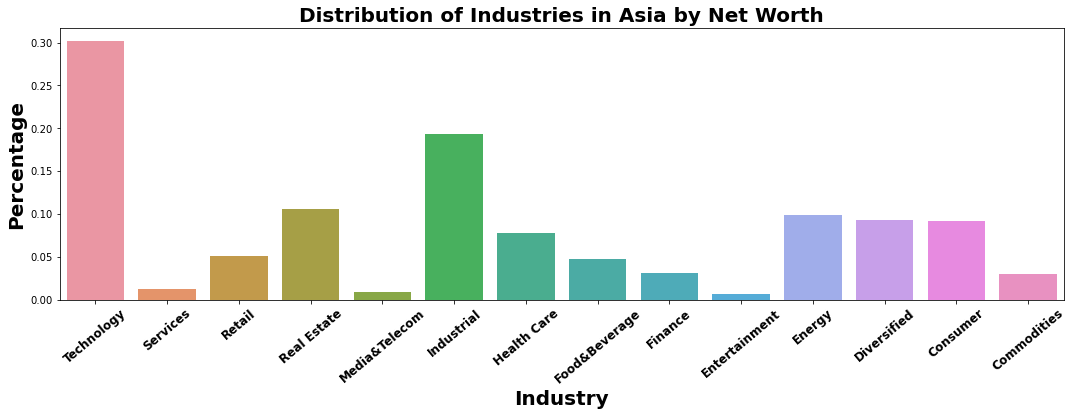

In [29]:
#graph
fig = plt.figure(figsize=(18,5))#graph size
plot = sns.barplot(data=g2,x='Industry',y='PercentageOfWealth')#the data to be included

plt.title("Distribution of Industries in Asia by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=40)#to style the x axis data

***the above graph shows that the technology industry accounts to 30% by the total net worth combined for all individuals in Asia***

## Africa

In [30]:
#Billionaires in Africa

Africa = df1[df1['Country'].isin(['Nigeria','SouthAfrica', 'Egypt'])]#only including countries in Africa
Africa.sample(5)#overview of the data

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
101,Aliko Dangote,19.20,0.1190,1.410,Nigeria,Industrial
337,Natie Kirsh,8.10,0.7380,1.640,SouthAfrica,Food&Beverage
419,Nassef Sawiris,6.87,-0.0678,0.273,Egypt,Industrial
238,Johann Rupert&family,10.10,-0.1550,2.100,SouthAfrica,Diversified
331,Nicky Oppenheimer,8.15,0.0000,1.000,SouthAfrica,Diversified


In [31]:
#groupby in terms of percentage
g3=Africa.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order
g3['PercentageOfWealth'] = g3['Total_Net_Worth_Billions(USD)']/Africa['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g3.head(21)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
2,Industrial,26.07,0.497329
1,Food&Beverage,8.10,0.154521
0,Diversified,18.25,0.348150


***The above table shows that the distribution(by total net worth) is the highest in the Industrial sector close to $26.07 billion***

(array([0, 1, 2]),
 [Text(0, 0, 'Industrial'),
  Text(1, 0, 'Food&Beverage'),
  Text(2, 0, 'Diversified')])

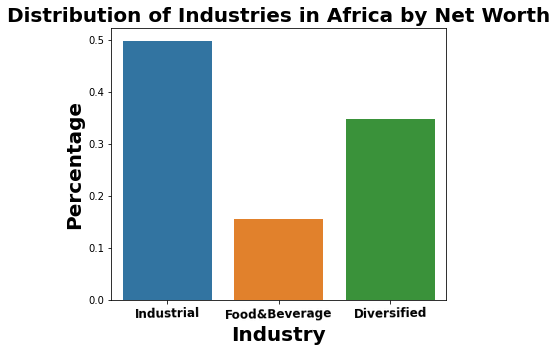

In [32]:
#graph
fig = plt.figure(figsize=(6,5))#graph size
plot = sns.barplot(data=g3,x='Industry',y='PercentageOfWealth')#the data to be included

plt.title("Distribution of Industries in Africa by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=1)#to style the x axis data

***the above graph shows that the Industrial industry accounts close to 50% by the total net worth combined for all individuals in Africa***

## Middle East

In [33]:
#Billionaires in the MiddleEast

MiddleEast = df1[df1['Country'].isin(['SaudiArabia','Israel','UAE',])]#only including countries in the Middle East
MiddleEast

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
117,Alwaleed Bin Talal,17.60,-0.04930,1.340,SaudiArabia,Diversified
191,Eyal Ofer,11.70,0.00494,1.350,Israel,Services
357,Shari Arison,7.72,-0.02390,1.170,Israel,Diversified
375,Stef Wertheimer,7.35,0.00000,0.825,Israel,Diversified
388,Mohammed Al Amoudi,7.20,-0.23300,-0.366,SaudiArabia,Energy
436,Idan Ofer,6.62,-0.00899,1.720,Israel,Energy
473,M A Yusuff Ali,6.13,-0.03060,0.702,UAE,Food&Beverage
494,Majid Al Futtaim,5.92,-0.00633,-0.686,UAE,Real Estate


In [34]:
#groupby in terms of percentage
g4=MiddleEast.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order
g4['PercentageOfWealth'] = g4['Total_Net_Worth_Billions(USD)']/MiddleEast['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g4.head(15)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
4,Services,11.70,0.166572
3,Real Estate,5.92,0.084282
2,Food&Beverage,6.13,0.087272
1,Energy,13.82,0.196754
0,Diversified,32.67,0.465120


***The above table shows that the distribution(by total net worth) is the highest in the Diversified sector close to $33 billion***

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Services'),
  Text(1, 0, 'Real Estate'),
  Text(2, 0, 'Food&Beverage'),
  Text(3, 0, 'Energy'),
  Text(4, 0, 'Diversified')])

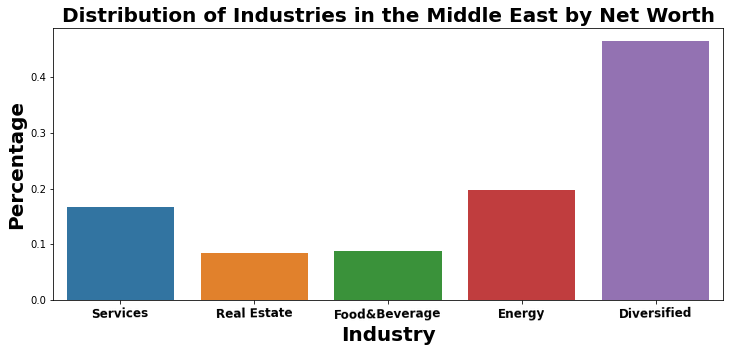

In [35]:
#graph
fig = plt.figure(figsize=(12,5))#graph size
plot = sns.barplot(data=g4,x='Industry',y='PercentageOfWealth')#the data to be included

plt.title("Distribution of Industries in the Middle East by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=1)#to style the x axis data

***the above graph shows that the diversified industry accounts close to 50% by the total net worth combined for all individuals in Middle East***

## Oceania

In [36]:
#Billionaires in Australia and New Zealand

Oceania = df1[df1['Country'].isin(['Australia','New Zealand'])]#only including countries in Oceania
Oceania.sample(5)#overview of the data

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
221,Harry Triguboff,10.70,0.0000,1.01,Australia,Real Estate
252,Graeme Hart,9.81,0.0515,-1.99,New Zealand,Finance
114,Gina Rinehart,18.10,0.4300,-10.60,Australia,Commodities
497,Melanie Perkins,5.89,0.0000,4.99,Australia,Services
122,Andrew Forrest,16.50,-0.1300,-5.81,Australia,Commodities


In [37]:
#groupby in terms of percentage
g5=Oceania.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')#to do a total of the 'Total_Net_Worth_Billions(USD)' column in descending order
g5['PercentageOfWealth'] = g5['Total_Net_Worth_Billions(USD)']/Oceania['Total_Net_Worth_Billions(USD)'].sum()#creating a column for the 'percentage of wealth and dividing the total of the 'Total_Net_Worth_Billions(USD)' column of each industry to the total net worth combined
g5.head(15)

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
5,Technology,55.40,0.379582
4,Services,11.78,0.080713
3,Real Estate,18.55,0.127098
2,Industrial,9.02,0.061802
1,Finance,9.81,0.067215
0,Commodities,41.39,0.283590


***The above table shows that the distribution(by total net worth) is the highest in the technology sector close at $55.40 billion***

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Real Estate'),
  Text(3, 0, 'Industrial'),
  Text(4, 0, 'Finance'),
  Text(5, 0, 'Commodities')])

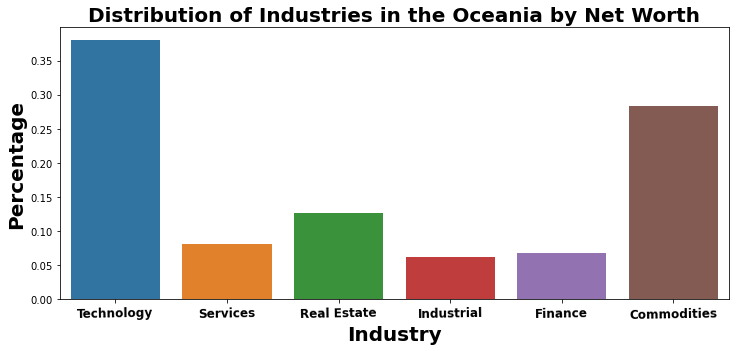

In [38]:
#graph
fig = plt.figure(figsize=(12,5))#graph size
plot = sns.barplot(data=g5,x='Industry',y='PercentageOfWealth')#the data to be included

plt.title("Distribution of Industries in the Oceania by Net Worth",fontsize=20,fontweight='bold')#title of the graph
plt.ylabel("Percentage",fontsize=20,fontweight='bold')#title of the Y axis
plt.xlabel("Industry",fontsize=20,fontweight='bold')#title of the x axis
plt.xticks(fontsize=12,fontweight='bold',rotation=1)#to style the x axis data

***the above graph shows that the technology industry accounts close to 40% by the total net worth combined for all individuals in Oceania***

## **Potential issues in the exploratory Analysis**

***Based on the above analysis by answering a series of questions is that although this doesn't truly reflect the worth of the industry itself across these regions. However, the analysis still gives a glimpse what exactly are these individuals doing as their source of wealth***.

## **Why were the chosen methods used to analyse the data?**

***The chosen methods were used in the analysis because as an overview for myself, I would like to know that as a job seeker, am I in the right industry?, which is why I needed to know these above mentioned questions - so that I can get a glimpse of whether the industry is stable, growing and whether there are lots of ample opportunities or no. Now as a Canadian living in North America, I would personally like to be in a role that involves technology because technology clearly because of the above analysis. Also based off my hypothesis, the above methods and questions were the only ways to find out which industry is thriving regardless of the net worth of the individuals. Also upon checking the correlation of the overall data, the numbers are positive and they are on the higher side.***

## **Insights and recommendation from the exploratory data analysis**

***From this analysis by using the billionaires net worth that technology is a thriving industry in Asia, Oceania and in the Americas. Other industries such as Industrial, Commodities, retail and Finance are also good to be a part of as a job seeker. Of course every industry would have some technology aspects integrated to it because nowadays technology such as Microsoft, Tesla, Amazon products are very embedded as part of our lives I would say technology is the way to go when looking for a job. Also, as we can see that Europe is big in the consumer and the industrial industry which are constantly evolving due to changes in tastes and preferences of the consumers such as the big brands like LVMH, Chanel, L'Oreal S.A, Zara SA and many more to mention. As well in Africa, we see that the industrial sector is big and there are no surprises which is probably the continent that mainly comprises of all countries that are still developing and lots of potentials to be uncovered for the top companies like Dangote Group. In a nutshell - my hypothesis is false, although the diversified industry is a thriving one for many of these billionaires across all the regions but its not at the limelight when compared to other bigger industries, as a part of my recommendation - these individuals should look into developing a niche in their portfolio and build on it. Although diversified industry in big in the Middle East sector, my hypothesis is still false because obviously at other regions, the billionaires are from different industries.***